<b>Get level of stroke risk from dataset</b>

This page is used to get basic analysis of data, bellow actions are taken:
- Explore dataset, 
- Visuliaze data
- Basic preporocessing
- Export new excel file

_______________________________________
<b>1. Import libraries and explore data</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col='id')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


___________________________
<b>2. Initial Exploratory analysis</b>

In [3]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [5]:
data.isna().sum().sort_values(ascending=False)

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
dtype: int64

___________________________
<b>3. Preliminary data analysis</b>

Define plotting function  

In [6]:
def plot(x, y,title,xaxis,yaxis,xmetric = None):
    """
    plot simple bar chart
    """
    
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_title(title)
    
    plt.ylabel(yaxis)
    plt.xlabel(xaxis)

In [7]:
data[['gender','stroke']].groupby(['gender'], as_index=False).sum()

,gender,stroke
0,Female,141
1,Male,108
2,Other,0


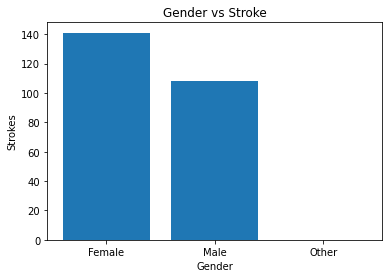

In [8]:
df1 = data[['gender','stroke']].groupby(['gender'], as_index=False).sum()

x = np.array(df1.iloc[:,0])
y = np.array(df1.iloc[:,1])

plot(x,y,"Gender vs Stroke", "Gender", 'Strokes')

In [9]:
data[['ever_married','stroke']].groupby(['ever_married'], as_index=False).sum()

,ever_married,stroke
0,No,29
1,Yes,220


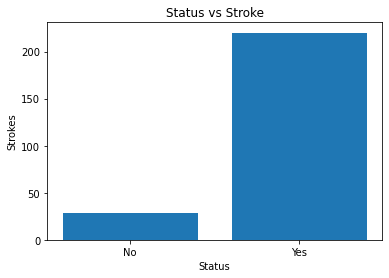

In [10]:
df2 = data[['ever_married','stroke']].groupby(['ever_married'], as_index=False).sum()

x = np.array(df2.iloc[:,0])
y = np.array(df2.iloc[:,1])

plot(x,y,"Status vs Stroke", "Status", 'Strokes')

In [11]:
data[['heart_disease','stroke']].groupby(['heart_disease'], as_index=False).sum()

,heart_disease,stroke
0,0,202
1,1,47


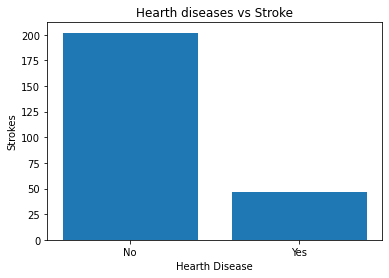

In [12]:
df3 = data[['heart_disease','stroke']].groupby(['heart_disease'], as_index=False).sum()

x = ['No','Yes']
y = np.array(df3.iloc[:,1])

plot(x,y,"Hearth diseases vs Stroke", "Hearth Disease", 'Strokes')

In [13]:
data[['hypertension','stroke']].groupby(['hypertension'], as_index=False).sum()

,hypertension,stroke
0,0,183
1,1,66


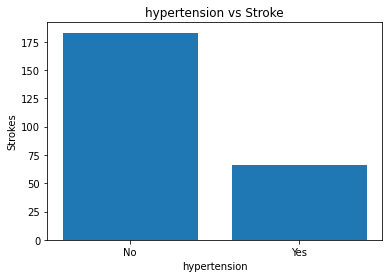

In [14]:
df4 = data[['hypertension','stroke']].groupby(['hypertension'], as_index=False).sum()

x = ['No','Yes']
y = np.array(df4.iloc[:,1])

plot(x,y,"hypertension vs Stroke", "hypertension", 'Strokes')

In [15]:
data[['smoking_status','stroke']].groupby(['smoking_status'], as_index=False).sum().sort_values(by='stroke',ascending=False)

,smoking_status,stroke
2,never smoked,90
1,formerly smoked,70
0,Unknown,47
3,smokes,42


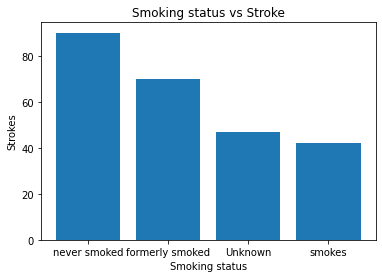

In [16]:
df4 = data[['smoking_status','stroke']].groupby(['smoking_status'], as_index=False).sum().sort_values(by='stroke',ascending=False)

x = np.array(df4.iloc[:,0])
y = np.array(df4.iloc[:,1])

plot(x,y,"Smoking status vs Stroke", "Smoking status", 'Strokes')

In [17]:
data[['work_type','stroke']].groupby(['work_type'], as_index=False).sum().sort_values(by='stroke',ascending=False)

,work_type,stroke
2,Private,149
3,Self-employed,65
0,Govt_job,33
4,children,2
1,Never_worked,0


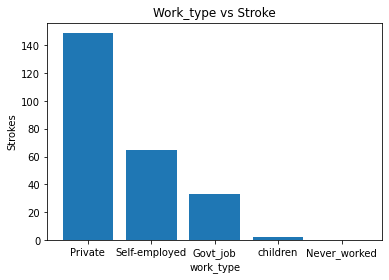

In [18]:
df5 = data[['work_type','stroke']].groupby(['work_type'], as_index=False).sum().sort_values(by='stroke',ascending=False)

x = np.array(df5.iloc[:,0])
y = np.array(df5.iloc[:,1])

plot(x,y,"Work_type vs Stroke", "work_type", 'Strokes')


___________________________
<b>4.Get new columns</b>

Explore categories of Age_group via qcut

In [19]:
train_df = data.copy()
train_df['Age_group'] = pd.qcut(train_df['age'],q=4,labels=None)
train_df['Age_group']

id
9046     (61.0, 82.0]
51676    (45.0, 61.0]
31112    (61.0, 82.0]
60182    (45.0, 61.0]
1665     (61.0, 82.0]
             ...     
18234    (61.0, 82.0]
44873    (61.0, 82.0]
19723    (25.0, 45.0]
37544    (45.0, 61.0]
44679    (25.0, 45.0]
Name: Age_group, Length: 5110, dtype: category
Categories (4, interval[float64]): [(0.079, 25.0] < (25.0, 45.0] < (45.0, 61.0] < (61.0, 82.0]]

Explore categories of avg_glucose_level via qcut

In [20]:
train_df['avg_glucose_level_group'] = pd.qcut(train_df['avg_glucose_level'],q=4,labels=None)
train_df['avg_glucose_level_group']

id
9046     (114.09, 271.74]
51676    (114.09, 271.74]
31112    (91.885, 114.09]
60182    (114.09, 271.74]
1665     (114.09, 271.74]
               ...       
18234    (77.245, 91.885]
44873    (114.09, 271.74]
19723    (77.245, 91.885]
37544    (114.09, 271.74]
44679    (77.245, 91.885]
Name: avg_glucose_level_group, Length: 5110, dtype: category
Categories (4, interval[float64]): [(55.119, 77.245] < (77.245, 91.885] < (91.885, 114.09] < (114.09, 271.74]]

Explore categories of bmi_group via qcut

In [21]:
train_df['bmi_group'] = pd.qcut(train_df['bmi'],q=4, labels=None)
train_df['bmi_group']

id
9046     (33.1, 97.6]
51676             NaN
31112    (28.1, 33.1]
60182    (33.1, 97.6]
1665     (23.5, 28.1]
             ...     
18234             NaN
44873    (33.1, 97.6]
19723    (28.1, 33.1]
37544    (23.5, 28.1]
44679    (23.5, 28.1]
Name: bmi_group, Length: 5110, dtype: category
Categories (4, interval[float64]): [(10.299000000000001, 23.5] < (23.5, 28.1] < (28.1, 33.1] < (33.1, 97.6]]

___________________________________________
<b>5. Final data analysis</b>

In [22]:
train_df.groupby(['Age_group','gender'])['stroke'].sum()

Age_group      gender
(0.079, 25.0]  Female     2.0
               Male       0.0
               Other      NaN
(25.0, 45.0]   Female     8.0
               Male       3.0
               Other      0.0
(45.0, 61.0]   Female    34.0
               Male      31.0
               Other      NaN
(61.0, 82.0]   Female    97.0
               Male      74.0
               Other      NaN
Name: stroke, dtype: float64

In [23]:
train_df.groupby(['bmi_group','gender'])['stroke'].sum()

bmi_group                   gender
(10.299000000000001, 23.5]  Female    17.0
                            Male       5.0
                            Other      0.0
(23.5, 28.1]                Female    37.0
                            Male      26.0
                            Other      NaN
(28.1, 33.1]                Female    34.0
                            Male      34.0
                            Other      NaN
(33.1, 97.6]                Female    32.0
                            Male      24.0
                            Other      NaN
Name: stroke, dtype: float64

In [24]:
train_df.groupby(['avg_glucose_level_group','gender'])['stroke'].sum()

avg_glucose_level_group  gender
(55.119, 77.245]         Female    39.0
                         Male      16.0
                         Other      NaN
(77.245, 91.885]         Female    22.0
                         Male      16.0
                         Other      NaN
(91.885, 114.09]         Female    27.0
                         Male      21.0
                         Other      NaN
(114.09, 271.74]         Female    53.0
                         Male      55.0
                         Other      0.0
Name: stroke, dtype: float64

___________________
<b>6. Fill NaN values and preprocess groups</b>

In [25]:
train_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group,avg_glucose_level_group,bmi_group
id,,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"(61.0, 82.0]","(114.09, 271.74]","(33.1, 97.6]"
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,"(45.0, 61.0]","(114.09, 271.74]",NaN
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"(61.0, 82.0]","(91.885, 114.09]","(28.1, 33.1]"
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"(45.0, 61.0]","(114.09, 271.74]","(33.1, 97.6]"
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"(61.0, 82.0]","(114.09, 271.74]","(23.5, 28.1]"


In [26]:
train_df['bmi'].isna().sum()

201

In [27]:
train_df['bmi'] = train_df['bmi'].fillna(data['bmi'].mean())

In [28]:
train_df['bmi'].isna().sum()

0

In [29]:
train_df['Age_group'] = pd.qcut(train_df['age'],q=4,labels=[0,1,2,3])
train_df['bmi_group'] = pd.qcut(train_df['bmi'],q=4, labels=[0,1,2,3])
train_df['avg_glucose_level_group'] = pd.qcut(train_df['avg_glucose_level'],q=4,labels=[0,1,2,3])

In [30]:
train_df.isna().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
stroke                     0
Age_group                  0
avg_glucose_level_group    0
bmi_group                  0
dtype: int64

Drop "Other" gender since there is only one record and it would skewed prediction

In [31]:
train_df[(train_df.gender == 'Other')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_group,avg_glucose_level_group,bmi_group
id,,,,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,1,3,0


In [32]:
i = train_df[(train_df.gender == 'Other')].index

train_df = train_df.drop(i)

<b>7. Export as csv file></b>

In [33]:
train_df.to_csv('train_data.csv')

Exported train_data.csv will be loaded by following page and additional steps will be conducted